# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities[0])

Number of cities in the list: 618
yellowknife


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?'# YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'q={city}&appid={weather_api_key}&units=imperial'# YOUR CODE HERE
    r = requests.get(url + city_url).json()
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = r['weather'][0]['main']# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = r['coord']['lat'] # YOUR CODE HERE
        city_lng = r['coord']['lon']# YOUR CODE HERE
        city_max_temp = r['main']['temp_max']# YOUR CODE HERE
        city_humidity = r['main']['humidity']# YOUR CODE HERE
        city_clouds = r['clouds']['all']# YOUR CODE HERE
        city_wind = r['wind']['speed']# YOUR CODE HERE
        city_country = r['sys']['country'] # YOUR CODE HERE
        city_date = r['dt'] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | fort nelson
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | norman wells
Processing Record 9 of Set 1 | neiafu
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | bagdarin
Processing Record 12 of Set 1 | damara
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | cockburn town
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | kavarna
Processing Record 19 of Set 1 | taltal
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | fukue
Processing Record 22 of Set 1 | helong
Processing Record 23 of Set 1 | ka

Processing Record 42 of Set 4 | bac lieu
Processing Record 43 of Set 4 | portland
Processing Record 44 of Set 4 | pandan
Processing Record 45 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 46 of Set 4 | vestmannaeyjar
Processing Record 47 of Set 4 | kabalo
Processing Record 48 of Set 4 | qaqortoq
Processing Record 49 of Set 4 | revelstoke
Processing Record 0 of Set 5 | katsuura
Processing Record 1 of Set 5 | souillac
Processing Record 2 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 3 of Set 5 | pilar
Processing Record 4 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 5 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 5 | kamenka
Processing Record 7 of Set 5 | longlac
City not found. Skipping...
Processing Record 8 of Set 5 | necochea
Processing Record 9 of Set 5 | valdivia
Processing Record 10 of Set 5 | ancud
Processing Record 11 of Set 5 | marcona
City not found. Skipping...
Processing Re

Processing Record 28 of Set 8 | pozo colorado
Processing Record 29 of Set 8 | knesselare
Processing Record 30 of Set 8 | warrnambool
Processing Record 31 of Set 8 | zaraza
Processing Record 32 of Set 8 | ambanja
Processing Record 33 of Set 8 | ritchie
Processing Record 34 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 35 of Set 8 | dubti
Processing Record 36 of Set 8 | toccoa
Processing Record 37 of Set 8 | thunder bay
Processing Record 38 of Set 8 | weligama
Processing Record 39 of Set 8 | ahipara
Processing Record 40 of Set 8 | high level
Processing Record 41 of Set 8 | blonduos
City not found. Skipping...
Processing Record 42 of Set 8 | llangefni
Processing Record 43 of Set 8 | kismayo
Processing Record 44 of Set 8 | pervomayskoye
Processing Record 45 of Set 8 | harrison
Processing Record 46 of Set 8 | hirara
Processing Record 47 of Set 8 | labutta
City not found. Skipping...
Processing Record 48 of Set 8 | kirkenaer
Processing Record 49 of Set 8 | p

Processing Record 16 of Set 12 | cuitareo
Processing Record 17 of Set 12 | jinchang
Processing Record 18 of Set 12 | pierre
Processing Record 19 of Set 12 | forbes
Processing Record 20 of Set 12 | ibiuna
Processing Record 21 of Set 12 | inyonga
Processing Record 22 of Set 12 | arlit
Processing Record 23 of Set 12 | baiao
Processing Record 24 of Set 12 | akdagmadeni
Processing Record 25 of Set 12 | diffa
Processing Record 26 of Set 12 | coihaique
Processing Record 27 of Set 12 | khasan
Processing Record 28 of Set 12 | morgan hill
Processing Record 29 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 30 of Set 12 | sena madureira
Processing Record 31 of Set 12 | tefe
Processing Record 32 of Set 12 | bolshoy uluy
City not found. Skipping...
Processing Record 33 of Set 12 | walvis bay
Processing Record 34 of Set 12 | sukumo
Processing Record 35 of Set 12 | grand centre
City not found. Skipping...
Processing Record 36 of Set 12 | komatipoort
Processing Record 37 of Set 12

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()
#city_data_df.head()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-6.88,81,100,7.72,CA,1675624006
1,georgetown,5.4112,100.3354,76.95,99,20,2.30,MY,1675623746
2,atuona,-9.8000,-139.0333,78.22,80,20,16.71,PF,1675624007
3,san patricio,28.0170,-97.5169,78.66,57,2,6.24,US,1675623929
4,ushuaia,-54.8000,-68.3000,49.62,57,40,29.93,AR,1675624009


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-6.88,81,100,7.72,CA,1675624006
1,georgetown,5.4112,100.3354,76.95,99,20,2.30,MY,1675623746
2,atuona,-9.8000,-139.0333,78.22,80,20,16.71,PF,1675624007
3,san patricio,28.0170,-97.5169,78.66,57,2,6.24,US,1675623929
4,ushuaia,-54.8000,-68.3000,49.62,57,40,29.93,AR,1675624009


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

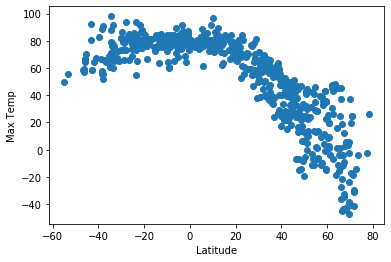

In [13]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temp')


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

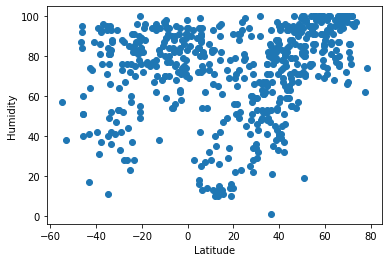

In [14]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

plt.scatter(x_values,y_values)
    
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

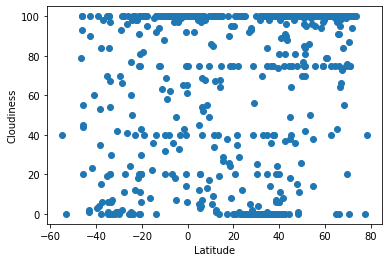

In [15]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

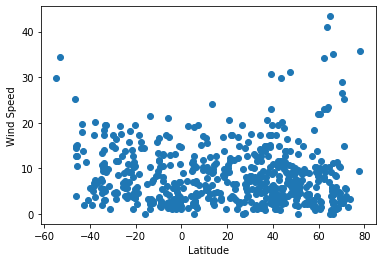

In [16]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(x_values,y_values)


# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linerReg(var1,var2,var3):
       if var3 == "nor":
        x_values = northern_hemi_df[var1]
        y_values = northern_hemi_df[var2]
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        print(f"The r-squared is: {rvalue**2}")
        regress_values = x_values * slope + intercept
        plt.scatter(x_values,y_values)
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        #plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
        plt.plot(x_values,regress_values,"r-")
        return line_eq
       elif var3 =="sou":
        x_values = southern_hemi_df[var1]
        y_values = southern_hemi_df[var2]
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        print(f"The r-squared is: {rvalue**2}")
        regress_values = x_values * slope + intercept
        plt.scatter(x_values,y_values)
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        #plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
        plt.plot(x_values,regress_values,"r-")
        return line_eq

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-6.88,81,100,7.72,CA,1675624006
1,georgetown,5.4112,100.3354,76.95,99,20,2.30,MY,1675623746
3,san patricio,28.0170,-97.5169,78.66,57,2,6.24,US,1675623929
5,fort nelson,58.8053,-122.7002,3.94,82,100,9.22,CA,1675624009
7,norman wells,65.2820,-126.8329,-15.93,98,97,0.92,CA,1675624010


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,atuona,-9.8000,-139.0333,78.22,80,20,16.71,PF,1675624007
4,ushuaia,-54.8000,-68.3000,49.62,57,40,29.93,AR,1675624009
6,rikitea,-23.1203,-134.9692,78.76,75,12,15.79,PF,1675623753
8,neiafu,-18.6500,-173.9833,75.88,88,100,17.27,TO,1675624010
9,cape town,-33.9258,18.4232,70.21,82,20,18.41,ZA,1675623839


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7413001338484987


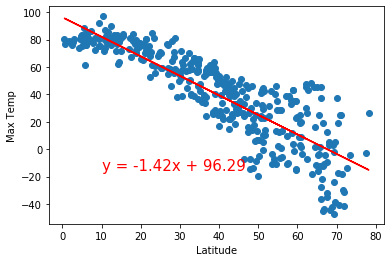

In [20]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

line_eq = linerReg('Lat','Max Temp','nor')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(10,-15),fontsize=15,color="red")
plt.show()

The r-squared is: 0.176828197104147


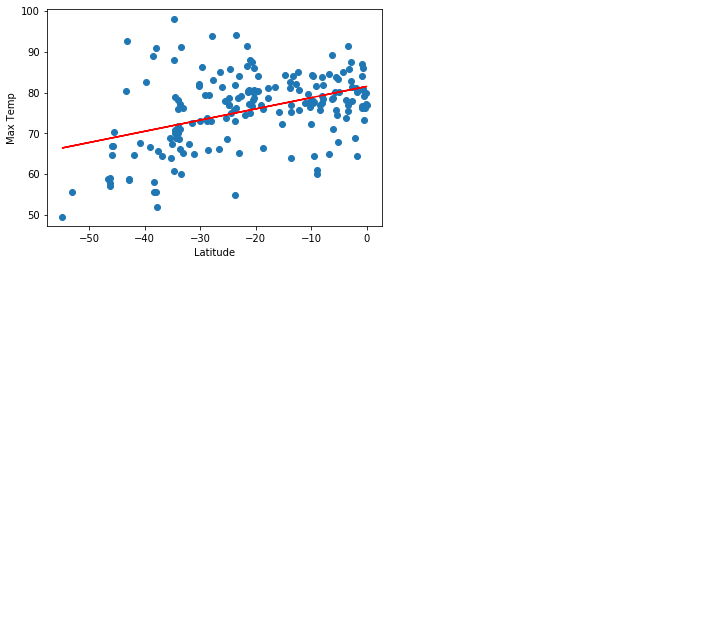

In [21]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
line_eq = linerReg('Lat','Max Temp','sou')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(35,-50),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship: It looks like in the northern hemisphere as the latitude increases the temperature decreases however in the southern hemisphere as the latitude increases the temperatrue increases. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.22083630890101583


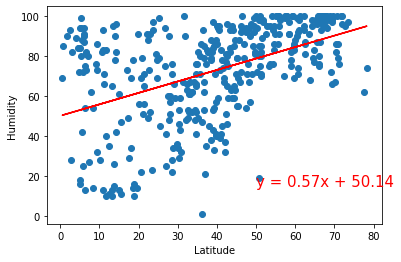

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
line_eq = linerReg('Lat','Humidity','nor')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.show()


The r-squared is: 0.10072309827838384


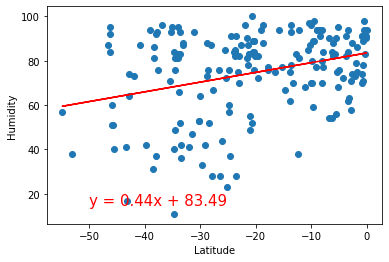

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
line_eq = linerReg('Lat','Humidity','sou')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.show()


**Discussion about the linear relationship: It looks like in both the northern and southern hemisphere as the latitude increases, the humidity increases as well. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.07302627730399677


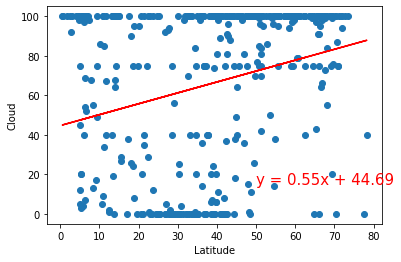

In [24]:
# Northern Hemisphere
# YOUR CODE HERE

line_eq = linerReg('Lat','Cloudiness','nor')
plt.xlabel('Latitude')
plt.ylabel('Cloud')
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.show()

The r-squared is: 0.1122628082055393


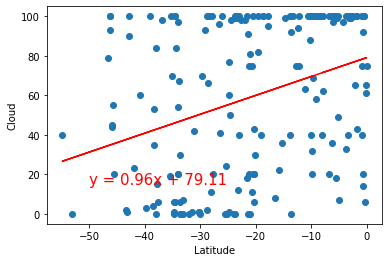

In [26]:
# Southern Hemisphere
# YOUR CODE HERE

line_eq = linerReg('Lat','Cloudiness','sou')
plt.xlabel('Latitude')
plt.ylabel('Cloud')
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship: It looks like in the northern and southern hemisphere there is a linear regression however there is not a close enough coorelation to correctly predict what will occur as the latitude increases or decreases. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0027030196128205557


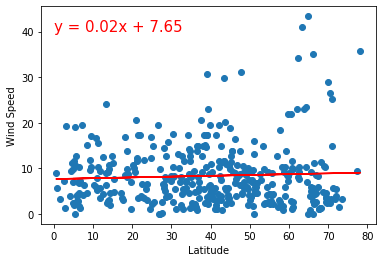

In [28]:
# Northern Hemisphere
# YOUR CODE HERE
line_eq = linerReg('Lat','Wind Speed','nor')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.show()

The r-squared is: 0.13886592800071443


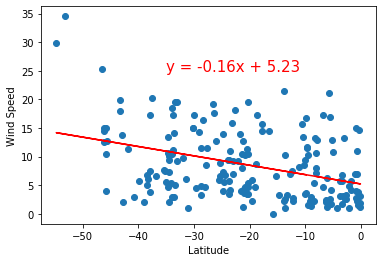

In [30]:
# Southern Hemisphere
# YOUR CODE HERE
line_eq = linerReg('Lat','Wind Speed','sou')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-35,25),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:It looks like in the northern and southern hemisphere the wind speed remains under 20 mph as the latitude is increased or decreased. 